# Image Preprocessor Documentation
## Contents
1. [Introduction to the PCB Defect Detection Project](#Chapter1)
2. [The Role of Image Preprocessing](#Chapter2)
3. [Preprocessing Experiences](#Chapter3)
3. [Inspiration and Framework Conceptualization](#Chapter3.5)
4. [Defining the Image Preprocessing Pipeline Goals](#Chapter4)
5. [Interactive Exploration of the Image Preprocessor](#Chapter5)
6. [Code Framework Overview](#Chapter6)
7. [Deep Dive into the ImagePreprocessor Class](#Chapter7)
8. [Understanding the StepBase Class](#Chapter8)
9. [Constructing Custom Image Preprocessing Classes](#Chapter9)
10. [Serialization with JSON](#Chapter10)
11. [The ClassInstancesSerializer and Randomization](#Chapter11)
12. [Interactive Pipeline Customization](#Chapter12)
13. [Conclusion and Further Steps](#Chapter13)
14. [References](#references)


<a id='Chapter1'></a>
## Chapter : Introduction to the PCB Defect Detection Project
Printed Circuit Boards (PCBs) are critical components of electronic devices, but detecting defects during production is difficult. These flaws can have an impact on device performance and safety, making detection a critical step.[[1]](#chapter--deep-dive-into-the-imagepreprocessor-class) Through Machine Learning (ML), we hope to improve this detection process.


While traditional methods of inspecting PCBs, such as Automatic Optical Inspection (AOI) systems, are used, they frequently struggle with the complexity of modern PCB designs, resulting in false positives—incorrectly marking good areas as defective.[[1]](#references) This is where our machine learning approach comes in, which begins with high-quality image data. The Image Preprocessing Project Framework is the subject of our present material. image preprocessing converts raw image data into a standardized format that is compatible with the PCB Defect Detector Model. It entails filtering the images, maintaining consistency, and bringing them up to a quality from which the ML model may effectively learn.


Our PCB defect management framework comprises of the following components:

- Identifying Defect Types: Specifying the types of defects to look for.

- Image Preprocessing: Collecting and preparing images in preparation for model.

- Model Development: is the process of creating an ML model for exact flaw identification.

- Model optimization: entails training the model with high-quality data in order to validate accuracy and reduce false positives.

In providing this framework, we establish the essential steps for developing an ML tool that aims to improve the accuracy of PCB defect detection, to enhance the reliability of the process itself.



<Your content goes here>

<a id='Chapter2'></a>
## Chapter : The Role of Image Preprocessing
When working with images, image preprocessing is a critical stage in the machine learning pipeline. It's not only about getting the images ready; it's also about making sure they're in good enough condition for the models to learn from. Here are the main reasons on why it is critical:

- Formatting and standardization: Images must be correctly formatted before being fed into a machine learning model. This includes ensuring that they are all the same size, positioned correctly, and that their colors are altered as needed. Convolutional Neural Networks (CNNs) require this since their layers expect uniformly sized inputs.[[2]](#references)

- Quality improvement: Good preprocessing aids in extracting the relevant elements of an image from which the model must learn. Pre-processing seeks to improve image data by improving specific visual attributes that are crucial for subsequent processing and analysis activities or suppressing undesired distortions.[[3]](#references) The goal is to enhance the quality of the data so that the model can deal with it more effectively.  Just as numbers are normalized and standardized in other ML Solutions, image preprocessing ensures that the model sees the images in a way that allows it to learn quickly and effectively.[[4]](#references)

- Efficiency and speed: When images are properly preprocessed, everything else in the machine learning process may move more quickly. Training models can take less time, and predictions can be made more quickly. This is especially significant when a large number of images exists to sort through because it allows us to accomplish more in less time.[[2]](#references)

In summary, preprocessing is suggested for any image-based machine learning project. It improves the model's performance, provides faster results, and guarantees that the learning process runs smoothly.


<a id='Chapter3'></a>
## Chapter : Preprocessing Experiences
At the beginning of my Journey to improve PCB image analysis using machine learning, I created a dedicated Jupyter Notebook called [image_preprocessing_evaluation.ipynb](./image_preprocessing_evaluation.ipynb). This notebook was used to evaluate multiple image preprocessing procedures, each of which aimed to increase the quality of PCB images for improved defect identification.

**Key Preprocessing Steps Investigated**:
1. Histogram Equalization: Balances image contrast.
1. Noise Reduction: Clears up image clarity.
1. Grayscale Conversion: Simplifies image complexity.
1. Resizing: Standardizes image dimensions.
1. Perspective Correction: Aligns image orientation (work in progress).
1. Thresholding: Enhances specific image features.
1. Morphological Operations: Attempts to refine image texture (results were mixed).
1. Normalization: Adjusts pixel value scales.
1. Standardization: Aims for uniform pixel values (found redundant post-Thresholding and Normalization).

**Evaluation Method:**
To evaluate these preprocessing processes, I used the Kaggle PCB Defect Dataset [[5]](#references).
The TensorFlow framework was used to handle the image collection efficiently.
I included in the TensorFlow framework built-in image preprocessing routines from OpenCV (cv2), allowing for easy application of preprocessing stages.

**Realizations and insights:**
While working on the notebook, I became aware of the vast number of potential image preprocessing combinations and parameters. This emphasized the need for having a flexible and robust framework in place to rapidly experiment with and assess different combinations The global histogram equalization stage was a prime example (see code snippet above). It necessitated a first step of mapping the dataset to ensure that each image was appropriately prepared for processing. This included wrapping each image in the `global_histogram_equalization` function. Following this mapping, the images, which were originally in TensorFlow format, were transformed to OpenCV format. In this format, the equalization procedure was then implemented. Finally, the images were transformed back to TensorFlow format for additional processing or analysis. This method demonstrated the complexities and importance of dealing with various image formats.


```python
def global_histogram_equalization(image_tensor, target_tensor):
    # Transformation to an Image Format accepted by OpenCV
    cv_img = image_tensor.numpy().astype('uint8')

    # Apply histogram equalization to each of the RGB channels independently
    channels = cv2.split(cv_img)
    eq_channels = [cv2.equalizeHist(ch) for ch in channels]  
    cv2_eq_image = cv2.merge(eq_channels)
    
    # Conversion back to tensor
    tf_eq_image = tf.convert_to_tensor(cv2_eq_image, dtype=tf.uint8) 
    
    return (tf_eq_image, target_tensor)

# Map the dataset elements to global_histogram_equalization
image_dataset_equalized_glo = image_dataset.map(
    lambda img, tgt: tf.py_function(
        func=global_histogram_equalization, 
        inp=[img, tgt], 
        Tout=(tf.uint8, tf.int8)
    )
)


<a id='Chapter3.5'></a>
## Chapter : Inspiration and Framework Conceptualization
The knowledge gained from testing various image preprocessing techniques, together with the insights gained from practicing basic machine learning in Python with scikit-learn, a famous Python machine learning tool, has lead me to a significant realization. Especially the pipeline technique employed in scikit-learn inspired me. A pipeline in scikit-learn applies a sequence of transformations and a final estimator successively.[[6]](#references) The result of the preceding phase is fed into each stage of the pipeline, speeding the data processing and modeling process. This method is extremely useful for assuring a consistent and efficient process, especially when doing many data transformation phases.

This inspiration sparked the idea for a comparable approach for image preprocessing in PCB Defect Detection. 

The envisioned framework seeks to provide an organized and fast approach to apply multiple preprocessing stages to images, similar to how the pipeline in scikit-learn streamlines the process of fitting models to data and producing predictions. This framework not only allows for simple experimentation with different combinations of stages, but also aligns with the need for systematic and reproducible preprocessing in machine learning for image analysis. This chapter represents the start of the projects target to develop an efficient image preprocessing tool for PCB defect detection.

The following sections of the documentation provide a step-by-step walkthrough of the Image Preprocessing Pipeline, enabling interactive reading (running of Jupyter Notebook Python cells).

<a id='Chapter5'></a>
## Chapter : Interactive Exploration of the Image Preprocessor
The interactive tour of creating an image preprocessing pipeline begins now. This hands-on activity will facilitate experimentation with different preprocessing stages applied to PCB images, enabling a visual assessment of the image quality.

**Creation of the pipeline:**
1. Select preprocessing steps: Begin by choosing from options such as histogram equalization, noise reduction, grayscale conversion, and more.
1. Order preprocessing steps: Order the steps carefully, as their order might have a considerable impact on the ultimate result. 
1. Set the preprocessing steps parameters: This is done by assigning values to preprocessing steps arguments.
1. Observation and experimentation: Experiment with different preprocessing step combinations and sequences. 

In [ ]:
# Imports
import importlib
import os

import source.load_raw_data.kaggle_dataset as kaggle_dataset
from source.utils.pcb_visualization import PCBVisualizerforTF
from source.image_preprocessing.image_preprocessor import ImagePreprocessor
import source.image_preprocessing.preprocessing_steps as steps


In [2]:
# Load Dataset
image_dataset = kaggle_dataset.load_tf_record()

In [4]:
preprocessor = ImagePreprocessor()

#TODO Build your own pipeline here:
pipeline = [
    steps.GaussianBlurFilter(kernel_size=(5,5), sigma=0.3),
    steps.AdaptiveHistogramEqualizer(clip_limit=2.0, tile_gridsize=(8,8)),
    steps.RGBToGrayscale(),
    steps.AdaptiveThresholder(block_size=15, c=-2),
    steps.SquareShapePadder(),
    steps.ShapeResizer(desired_shape=(1000,1000))
    # ... Add/change steps
]


preprocessor.set_pipe(pipeline)
processed_dataset = preprocessor.process(image_dataset)

5. Visual Comparison: Compare the original and processed images using side-by-side views. This will assist you in determining the effectiveness of your pipeline.

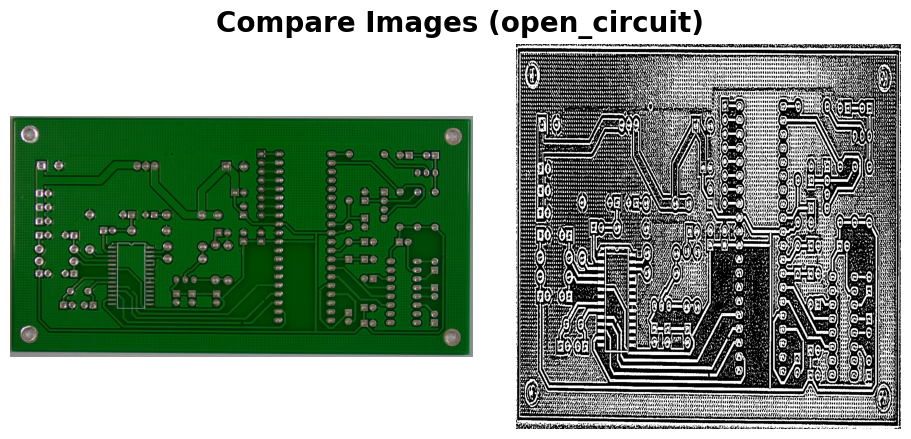

In [38]:
pcb_visualizer = PCBVisualizerforTF()
pcb_visualizer.plot_image_comparison(image_dataset, processed_dataset, 1)

Having gained an understanding of what the Image Preprocessing Framework does and the process of creating a pipeline, the next chapters will now examine the code underlying the preprocessing pipeline. They will explore the code's key elements to enhance understanding of its contributions to pipeline functionality.

<a id='Chapter-6'></a>
## Chapter : Code Framework Overview
Moving from interactive exploration of the Image Preprocessing Framework, the focus now shifts to understanding the architecture behind it.

**Framework Components**

- `ImagePreprocessor`: The main driver of the pipeline, managing the flow and application of preprocessing steps.
- `ClassInstancesSerializer`: A serialization utility that allows the saving and loading of pipelines.
- `StepBase`:  An abstract base class that defines the blueprint for all preprocessing stages.
- Preprocessing Steps: Concrete StepBase classes that each encapsulate a specific preprocessing function, such as AdaptiveHistogramEqualizer.

**Understanding the Structure with UML**

The attached UML (Unified Modeling Language) diagram visually breaks down these components and their relationships. This high-level overview serves as a map to navigate the interactions within the framework. To simplify the visual representation of the Image Preprocessing Framework only public methods and attributes are shown in the diagram.

![UML Diagram](./related/image_preprocessing_uml.png)

In the diagram, it is visible how `ImagePreprocessor` orchestrates the sequence of steps, while `ClassInstancesSerializer` handles the serialization of instances/pipeline. `StepBase` outlines the structure that each preprocessing step must adhere to, ensuring consistency and reliability.

**Preparing for Deeper Dive**

The next sections will go over each component depicted in the UML diagram. This includes a look at how the `ImagePreprocessor` controls the preprocessing pipeline, a look at `StepBase` and its subclasses, and a look at the serialization possibilities provided by `ClassInstancesSerializer`.


<a id='Chapter7'></a>
## Chapter : Understanding the ImagePreprocessor Class
The `ImagePreprocessor` class is the primary component of the Image Preprocessing Framework, managing the pipeline, consisting of preprocessing steps for PCB images. The class is defined in the [image_preprocessing.py](../image_preprocessor.py) module.

The `ImagePreprocessor` class has the following public attributes and methods at its core:

**Attributes**:

- `pipeline`: A sequence of steps, derived from `StepBase`, that are executed on image data.
- `serializer`: A `ClassInstancesSerializer` instance responsible for saving and loading the pipeline configuration.

**Methods**:

- `set_pipe`: Establishes the preprocessing steps in the pipeline.
- `pipe_append` and `pipe_pop`: Allow for adding and removing steps from the pipeline.
- `process`: Applies the pipeline to an image dataset in sequence.
- `save_pipe_to_json` and `load_pipe_from_json`: Methods for serialization and deserialization, crucial for maintaining the pipeline’s configuration.
- `load_randomized_pipe_from_json`: Similar to `load_pipe_from_json`, but allows also for randomization of the preprocessing steps arguments.

**Functionality**

The `ImagePreprocessor` class methodically manages a series of image preprocessing steps, specifically designed for PCB images. It facilitates the flexible assembly and alteration of the processing sequence, providing structured and repeatable image transformations. It has serialization features ensuring for efficient saving and loading of pipeline configurations.

To test the functionality and reliability of the `ImagePreprocessor` a test suite was developed. This test suite can also be used to gain deeper insights into the implementation of the class. The test suite is defined in the [image_preprocessing_test.py](../tests/image_preprocessing_test.py) module.

The `ImagePreprocessor` enforces the use of StepBase subclasses, ensuring a standardized approach to process images within a pipeline. Building on this, the focus of the next chapter shifts to the `StepBase` class, which serves as the foundation for each preprocessing step. This chapter will provide details about the class and explain how it defines the structure and functionality of each step in the pipeline.



<a id='Chapter8'></a>
## Chapter : Understanding the StepBase Class
The `StepBase` class is a fundamental component of the Image Preprocessing Framework, acting as a blueprint for each preprocessing step applied to PCB images. This class is defined in the [step_base.py](../preprocessing_steps/step_base.py) module.

The `StepBase` class has the following public attributes and methods at its core:

**Attributes:**
- `default_output_datatypes`:(Instance Attribute) Dictates the default data types for the output of the preprocessing steps, with image data typically as tf.uint8 and target data as tf.int8.
- `arguments_datatype`: (Class Attribute) Specifies the expected data types for the arguments of each preprocessing step.
- `name`: (Class Attribute) Acts as a unique identifier for each preprocessing step.
- `parameters`: Holds the parameters necessary for the specific preprocessing functionality.

**Methods:**
- `process_step`: (Abstract Method) To be implemented in child classes, defining the specific preprocessing operations.
- `_tensor_pyfunc_wrapper` and `_nparray_pyfunc_wrapper` (private methods): Static methods acting as decorators for wrapping the tensor or nparray representation of the image into the preprocessing steps. They ensure a correct mapping of TensorFlow datasets to the related function.

**Functionality**

The `StepBase` class enforces a structured approach, requiring child classes to implement the `process_step` method and specify `arguments_datatype` and name.
It provides decorators for flexibility in implementing preprocessing steps either as TensorFlow functions or Python functions working with NumPy arrays.
The class facilitates the integration of preprocessing steps within the image processing pipeline, emphasizing modularity and customization.

A comprehensive test suite, essential for ensuring the robustness and functionality of the `StepBase` class, can be found in [step_base_test.py](../tests/step_base_test.py).

The next chapter shifts the focus to practical implementation of preprocessing steps. It presents an interactive documentation  for the development and integration of custom image preprocessing steps into the pipeline.


<a id='Chapter9'></a>
## Chapter : Constructing Custom Image Preprocessing Classes


<a id='Chapter10'></a>
## Chapter : Serialization of the pipeline with JSON
This chapter focuses on the `ImagePreprocessor` class and its capability to serialize the pipeline configuration using JSON. This feature is crucial for saving and retrieving pipeline settings as required.

**Save and reload Pipeline**

In the previous chapter, a pipeline was successfully constructed. The subsequent step involves storing this pipeline to JSON.

In [6]:
json_path = os.path.join(os.path.curdir,  'related', 'pipeline.json')
preprocessor.save_pipe_to_json(json_path)

The pipeline was stored to [pipeline.json](./related/pipeline.json). Before reloading the pipeline modifications to the pipeline, including alterations in argument values, the sequence of steps, or the application of different steps, are welcome. It is important to note that the order of the preprocessing step entries in the JSON file corresponds to their sequence in the pipeline. For additional preprocessing steps and argument options, refer to the file [template.json](../pipelines/template.json). After finalizing these modifications, the `ImagePreprocessor` is capable of loading the updated pipeline.

In [36]:
preprocessor.load_randomized_pipe_from_json(json_path)
print(preprocessor.get_pipe_code_representation())

[
    GaussianBlurFilter(kernel_size=(7, 7), sigma=2.0),
    AdaptiveHistogramEqualizer(clip_limit=2.8424100152654432, tile_gridsize=(8, 8)),
    RGBToGrayscale(),
    AdaptiveThresholder(block_size=15, c=-1.7849445219278424),
    ShapeResizer(desired_shape=(1000, 1000), resize_method=nearest)
]


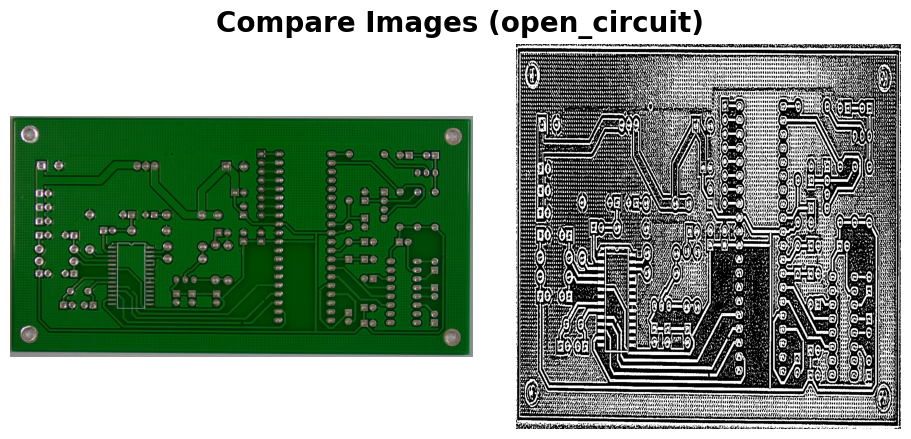

In [39]:
# Visualize results of the modified pipeline
processed_dataset = preprocessor.process(image_dataset)
pcb_visualizer.plot_image_comparison(image_dataset, processed_dataset, 1)

**Pipeline Randomization**

A significant challenge in the context of preprocessing PCB images is identifying appropriate parameters for each preprocessing step. Manually adjusting parameters within preprocessing steps is time consuming and inefficient. To improve this process, an additional feature that makes hyperparameter tuning easier has been implemented. The feature developed allows the specification of parameter ranges or distributions.


This feature involves using the JSON file to specify ranges or distribution of the parameters. The entry below can be copied into [pipeline.json](./related/pipeline.json). 

    {
        "Gaussian Blur Filter": {
            "kernel_size": [[3,3],[5,5],[7,7]],
            "sigma": {"distribution": "poisson", "lam": 3}
        },
        "Adaptive Histogram Equalizer": {
            "clip_limit": {"distribution": "uniform", "low": 0, "high": 3},
            "tile_gridsize": [[3,3],[5,5],[8,8]]
        },
        "RGB To Grayscale": {},
        "Adaptive Thresholding": {
            "block_size": "[15]*10 + [13]*8 + [17]*6",
            "c": {"distribution": "gaussian", "loc": -2, "scale": 1}
        },
        "Shape Resizer": {
            "desired_shape": "[[1000,1000]]*5 + [[1500,1500]]*4",
            "resize_method": ["bilinear", "bilinear", "nearest", "bicubic"]
        }
    }

    
The JSON entry of above for the randomized image preprocessing pipeline allows the definintion of parameter ranges and distributions for each preprocessing step:

- Parameter Range with List: Parameters can be specified as a list of values. For example, *"kernel_size": [[3,3],[5,5],[7,7]]* in *"Gaussian Blur Filter"* allows the `ImagePreprocessor` to randomly choose one of these kernel sizes. 
- Parameter Range with String: Certain parameters can be defined using a string that represents a weighted list of values. For instance, <i>"block_size": "[15]*10 + [13]*8 + [17]*6</i>" in *"Adaptive Thresholding"* creates a weighted list of block sizes for the system to select from. The [parse_and_repeat_test.py](../../utils/tests/parse_and_repeat_test.py) file provides additional insights.
- Parameter Distribution: Parameters can also be defined using a statistical distribution. For example, *"sigma": {"distribution": "poisson", "lam": 3}* sets *sigma* in *"Gaussian Blur Filter"* to follow a Poisson distribution with lambda = 3. Note, when specifying distributions only parameters of type float or int are allowed. The [get_sample_from_distribution_test.py](../../utils/tests/get_sample_from_distribution_test.py) file provides additional insights.

Modifications to the entries in the JSON file are permissible and encouraged. After making the desired changes, the updated pipeline configuration can be displayed and utilized for image preprocessing. 
    

In [ ]:
# Run this cell several times
preprocessor.load_randomized_pipe_from_json(json_path)
print(preprocessor.get_pipe_code_representation())

Upon getting to know the concepts of pipeline serialization and randomization, the next chapter will introduce the underlying class that manages these processes in support of the `ImagePreprocessor`. This chapter aims to provide an overview of the `ClassInstancesSerializer` class's structure.


<a id='Chapter11'></a>
## Chapter : Understanding the ClassInstancesSerializer 
The `ClassInstancesSerializer` is another fundamental component of the Image Preprocessing Framework that handles the serialization and deserialization of class instances or in this case the pipeline. It converts class instances and arguments to JSON and vice versa, making it especially useful for hyperparameter tuning and model experimentation.

The `ClassInstancesserializer` class has the following public attributes and methods at its core:

**Attributes:**

- `KEY_SEPARATOR`: A separator used to create unique keys for JSON objects.
- `instance_mapping`: A dictionary linking class names to the actual class objects, enabling instantiation from stored configurations.

**Methods:**
- `save_instance_list_to_json`: Serializes a list of class instances into a JSON file.
- `get_instances_from_json`: Reconstructs class instances with their specific parameters from a JSON file.
- `get_randomized_instances_from_json`: Deserializes instances with parameters that are randomly chosen within defined ranges.

**Functionality**

The `ClassInstancesSerializer` is built on the premise that class instances must contain a `parameters` attribute, and optionally, an `arguments_datatype` for proper serialization and deserialization. The `instance_mapping` attribute is vital for initializing instances of mapped classes from configurations stored in JSON. This is because in addition to managing parameters, the `ClassInstancesSerializer` employs recursive type conversion to ensure that data types align correctly with class attributes. This step is fundamental because JSON serialization of the pipeline in specific cases strips away the specificity of data types. More insights on the datatype conversion of the image preprocessing framework can be found in [recursive_type_conversion_test.py](../../utils/tests/recursive_type_conversion_test.py).

For comprehensive implementation details, including how instances are serialized, deserialized, and instantiated with their parameters, the test framework, found in [class_instances_serializer_test.py](../../utils/tests/class_instance_serializer_test.py) of the image preprocessor is referenced. It provides examples and scenarios that demonstrate the serializer's capabilities in action.




<a id='Chapter13'></a>
## Chapter : Conclusion and Further Steps

<Your content goes here>


<a id='references'></a>
## References

[1] G. Mahalingam, K. M. Gay, K. Ricanek, "PCB-METAL: A PCB Image Dataset for Advanced Computer Vision Machine Learning Component Analysis", _IEEE Xplore_, 2019. [Online]. Available: https://ieeexplore.ieee.org/document/8757928. Accessed December 4, 2023.

[2] J. Nelson, "What is Image Preprocessing and Augmentation?" _Roboflow Blog_, Jan 26, 2020. [Online]. Available: https://blog.roboflow.com/why-preprocess-augment/. Accessed December 4, 2023.

[3] Isahit, "What is the purpose of image preprocessing in deep learning?", Oct 11, 2022. _Isahit_. [Online]. Available: https://www.isahit.com/blog/what-is-the-purpose-of-image-preprocessing-in-deep-learning. Accessed December 4, 2023.

[4] S. Krig, "Image Pre-Processing," in _Computer Vision Metrics_, Springer, pp. 39–83, First Online: May 26, 2014. [Online]. Available: https://link.springer.com/chapter/10.1007/978-1-4302-5930-5_2. Accessed December 4, 2023.

[5] N. Elter, "PCB Defect dataset," Kaggle, updated Aug 2023. Available: https://www.kaggle.com/datasets/norbertelter/pcb-defect-dataset. Accessed December 4, 2023.

[6] Scikit-learn developers, "Pipeline: scikit-learn," Scikit-learn stable documentation, 2023. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html. Accessed December 4, 2023.
